<a href="https://colab.research.google.com/github/shindesomanath/CG-program/blob/main/Loan_prediction_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np


In [129]:
print('Version of pandas:', pd.__version__)

Version of pandas: 1.5.3


# Pre_Processing  Steps
      1.Filing the missing values

      2.converting the categories to number

      3.Bring all the variable in range 0 to 1

In [130]:
data=pd.read_csv("Loan_project.csv")

In [131]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Filling the missing values

## Categorical Data: Mode

In [132]:
# filling missing values of categorical variables with mode

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

## Continous Data : Mean

In [133]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [134]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 2. Coverting categories to Number

In [53]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [135]:
# converting the categories into numbers using map function
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [136]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


## 3.Bring all the variable in range 0 to 1

In [137]:
# bringing variables in the range 0 to 1
data['Dependents']=(data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [138]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [139]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [140]:
data.to_csv("Loan_prediction.csv",index=False)

# Steps to build a Neural Network using Keras

   1. Loading the dataset

   2.creating the training and validation set

   3.Defining the architecture of the model

   4.compling the model (defining loss fuction,optimize)

   5.training the model

   6. Evaluting the model performance on trainng and validation set

## 1.Loading the data

In [122]:
#importing the reqired libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.2.2


In [141]:
#loadingt the dataset
data=pd.read_csv("Loan_prediction.csv")

In [142]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [143]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [144]:

data.shape

(614, 13)

In [145]:
data=data.drop("Loan_ID",axis=1)

In [146]:
#separating the independent and dependent variables
X =data.drop("Loan_Status",axis=1)
Y=data["Loan_Status"]

In [147]:
X.shape,Y.shape

((614, 11), (614,))

# Creating the training and validation set

In [148]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=data["Loan_Status"],random_state=10,test_size=0.2)

In [149]:
(x_train.shape, y_train.shape), (x_test.shape ,y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3.Defining the architecture of the model

In [150]:
import keras
import tensorflow as tf


In [151]:
#importing the sequatial model
from keras.models import Sequential

In [152]:
#importing the differnt layer from keras
from keras.layers import InputLayer, Dense

In [153]:
#number of input neuron
x_train.shape

(491, 11)

In [154]:
# number of feature in the data
x_train.shape[1]

11

<img src='https://drive.google.com/uc?id=1tsy4B6G0UN4-J4L4roOdoWQiZMUdgw2a'>

In [155]:
# defining the input neurons
input_neurons=x_train.shape[1]

<img src='https://drive.google.com/uc?id=1xL_hM9rGItZjsZ8Lofwzw_9fZUi4bgJo'>

In [156]:
# nu,ber of output neurons

#since loan prediction is a bianary classification problem , we will have single neuron in the output layer


In [157]:
# define number of output neurons
output_neurons=1

In [158]:
#number of hidden layer ans hidden neurons
 # It is a Hyperparamter and we can pick the hidden layer and hidden nerons on our own

In [159]:
# defining the hidden layer and nerons in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [160]:
# activation of differnt layer
# for now  I have picked relu as an actiavtion fuction for hiddden layer
# since it is a binary classifiaction probliem , I have used sigmoid actiavtion in the final layer


In [161]:
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [162]:
# summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                120       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [163]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [164]:
# number od parameter between input  and first hidden layer adding the bias for each neurons of first hidden layer

input_neurons*neuron_hidden_layer_1 +10

120

In [165]:
 # number of parameter between first and sec. hidden layer

 neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [166]:
 #number of parameter between sec. hidden and output layer
neuron_hidden_layer_2* output_neurons +1


6

4.Compiling the model(defining the loss fuction ,optimizer

In [167]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

5.training the model

  training the model
   passing the independent and depenednt features for training set for training the model

   validation data will ne evauated at the end of each epoch
   setting the epoch as 50

   staring the trined model on model_history variable which will be used to vissualize the training process
   

In [168]:
model_history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 2s 22ms/step - loss: 0.6116 - accuracy: 0.6864 - val_loss: 0.5972 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6026 - accuracy: 0.6864 - val_loss: 0.5930 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5974 - accuracy: 0.6864 - val_loss: 0.5889 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5932 - accuracy: 0.6864 - val_loss: 0.5860 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 0.5894 - accuracy: 0.6864 - val_loss: 0.5824 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5848 - accuracy: 0.6864 - val_loss: 0.5787 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5807 - accuracy: 0.6864 - val_loss: 0.5754 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

In [173]:
# getting prediction for the validation set
predictions = np.argmax(model.predict(x_test),axis=1)

4/4 [==============================] - 0s 3ms/step


In [175]:
accuracy_score(y_test, predictions)

0.3089430894308943

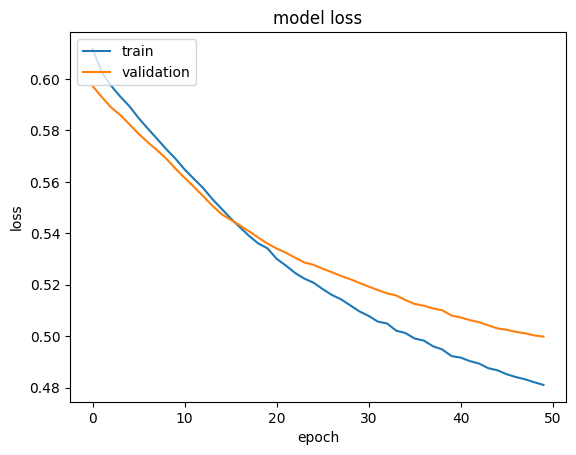

In [176]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

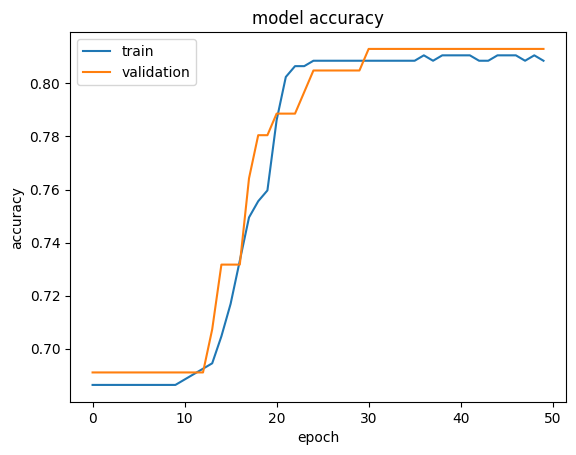

In [179]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()